In [2]:
import torch
import torch.nn as nn
import torch.optim as optim 
import torch.nn.functional as F
from torch.utils.data import DataLoader 
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from PIL import Image

# Create a Model class


In [3]:
class CNN(nn.Module):
    def __init__(self, in_channels=1, num_classes=10):
        super(CNN,self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3,out_channels=8,kernel_size=(3,3),stride=(1,1), padding=(1,1))      #same convolution
        self.pool = nn.MaxPool2d(kernel_size=(2,2), stride = (2,2))
        self.conv2 = nn.Conv2d(in_channels=8,out_channels=16, kernel_size=(3,3), stride=(1,1), padding=(1,1))
        self.fc1 = nn.Linear(16*270*270, num_classes)       # because we are applying 2 maxpooling layers in forward pass

    def forward(self,x):
        x = F.relu(self.conv1(x))
        x1 = x.clone().detach()  # Save feature map of conv1
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x2 = x.clone().detach()  # Save feature map of conv2
        x = self.pool(x)
        x = x.reshape(x.shape[0],-1)
        x = self.fc1(x)
        return x, x1, x2

In [4]:
model = CNN()

In [5]:
image = Image.open('/Users/maniksinghsarmaal/Downloads/My Photos/pint10.jpg')
image_transform = transforms.Compose([transforms.Resize((1080,1080))
    ,transforms.ToTensor()])
image_tensor = image_transform(image).unsqueeze(0)
print(image_tensor.shape)

torch.Size([1, 3, 1080, 1080])


# Visualise Filters by accessing weights


In [8]:
def visualize_filters(model):
    conv1_weights = model.conv1.weight.data
    conv2_weights = model.conv2.weight.data

    fig, axs = plt.subplots(2, 8, figsize=(16, 4))
    fig.suptitle('Visualization of Convolutional Filters', fontsize=16)
    for i in range(2):
        for j in range(8):
            ax = axs[i, j]
            if i == 0:
                ax.imshow(conv1_weights[j].cpu().numpy().transpose(0, 1, 2))  # Transpose to (height, width, channels)
                ax.set_title(f'Conv1 Filter {j+1}')
            else:
                ax.imshow(conv2_weights[j].cpu().numpy().transpose(0, 1, 2))  # Transpose to (height, width, channels)
                ax.set_title(f'Conv2 Filter {j+1}')
            ax.axis('off')

    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

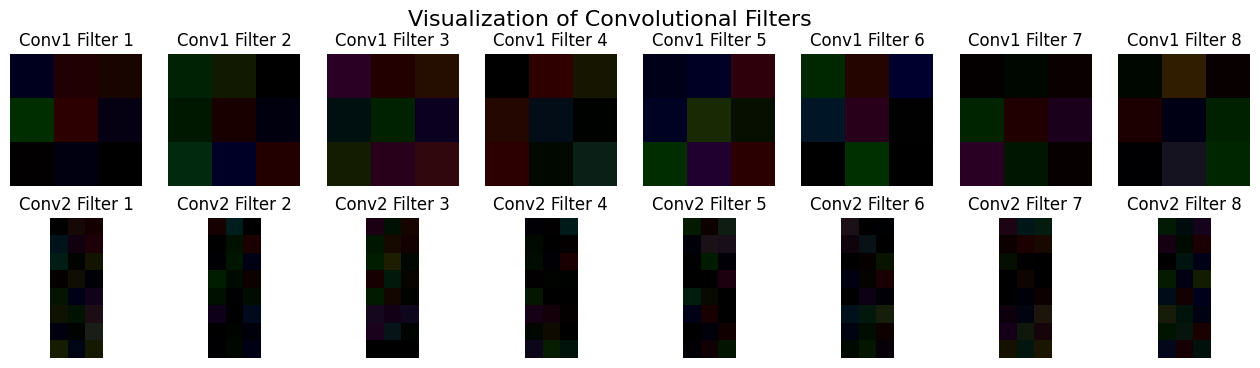

In [9]:
visualize_filters(model)

# Visualise Feature Maps 


In [131]:
def plot_feature_maps(feature_map_tensor, layer_name):
    num_features = feature_map_tensor.shape[1]
    num_rows = num_features // 4  # Assuming we want to plot 4 feature maps per row
    fig, axs = plt.subplots(num_rows, 4, figsize=(12, 3 * num_rows))
    fig.suptitle(f'Feature maps of {layer_name}', fontsize=16)
    for i in range(num_rows):
        for j in range(4):
            ax = axs[i, j] if num_rows > 1 else axs[j]
            ax.imshow(feature_map_tensor[0, i * 4 + j].cpu().detach().numpy(), cmap='viridis')
            ax.axis('off')

    plt.show()

In [134]:
output, fmap_conv1, fmap_conv2 = model(image_tensor)

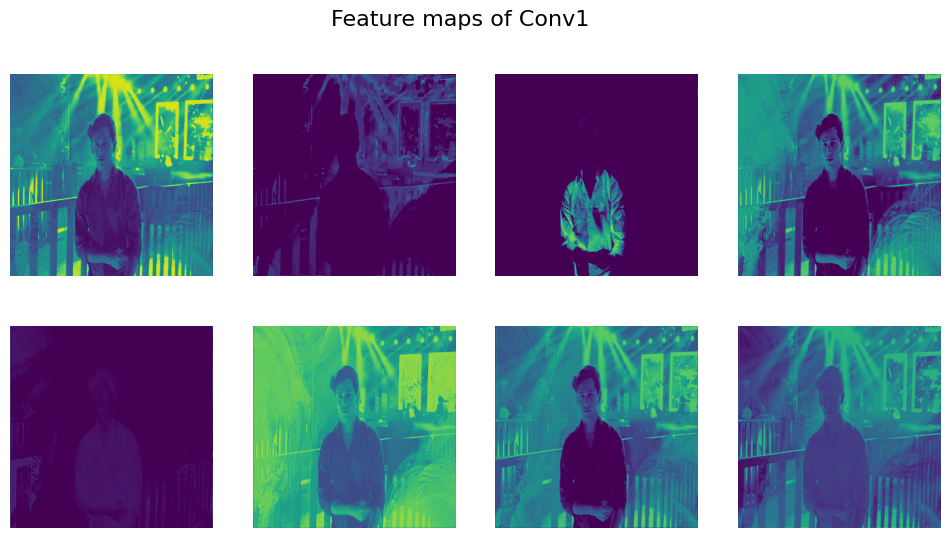

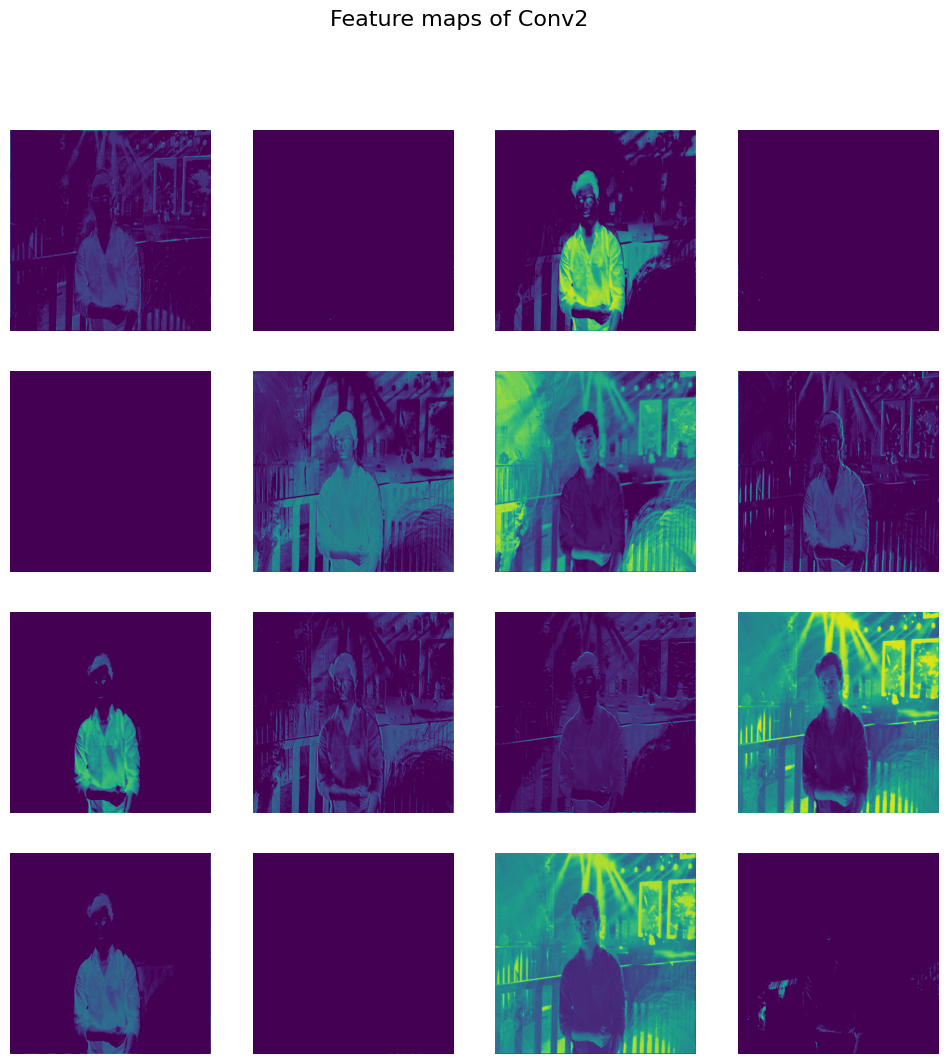

In [135]:
plot_feature_maps(fmap_conv1,'Conv1')
plot_feature_maps(fmap_conv2,'Conv2')
